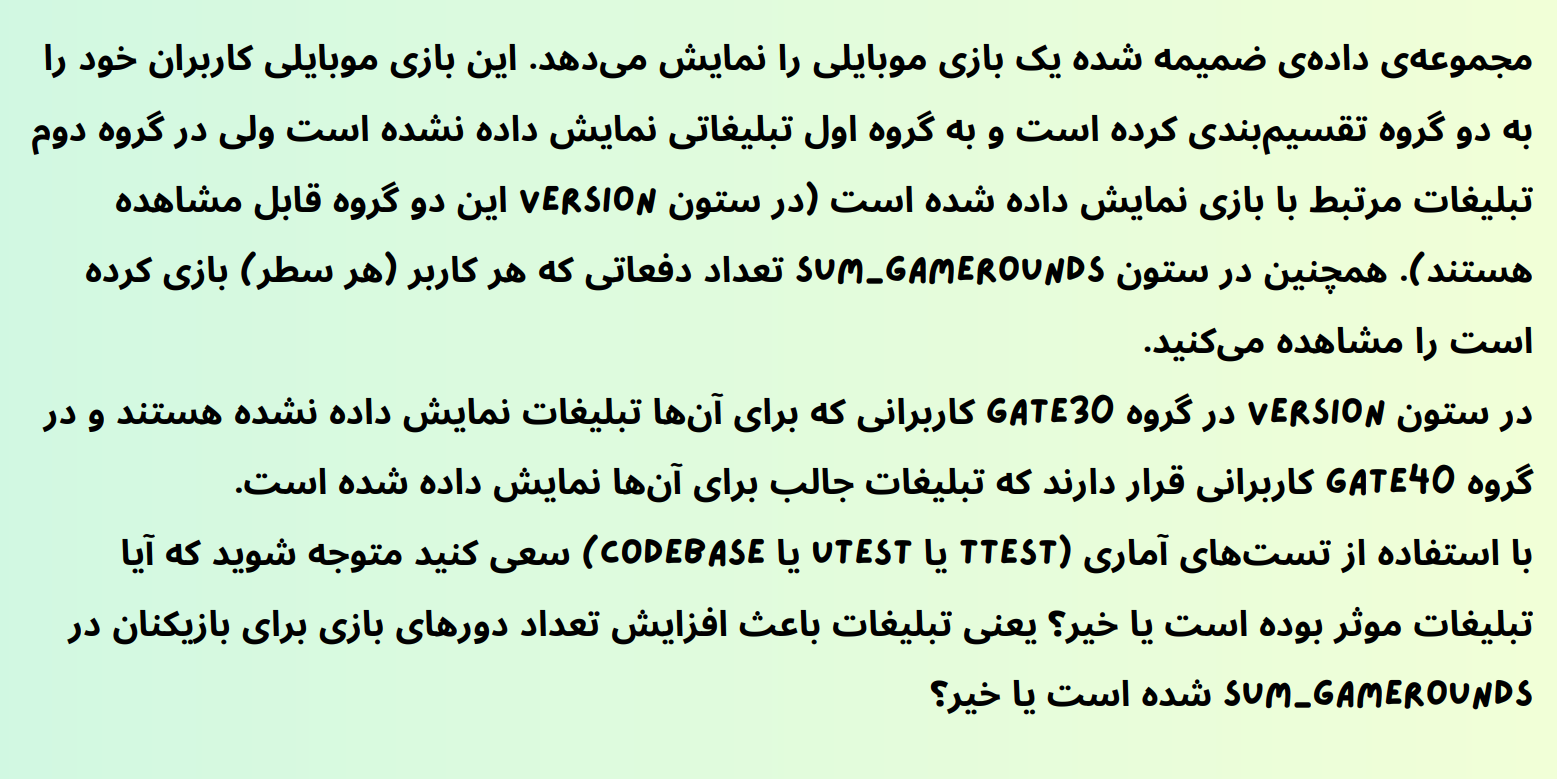

# **LOADING LIBRARI**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython import display

# **LOADING DATA**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/InferentialStatistics/InferentialStatistics_mobilegaming_Ex06/mibilegame.csv")

# **Data Overview**

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [5]:
df.shape

(90189, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


# **EDA**

In [7]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [8]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [9]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [10]:
df[df.duplicated()]

,userid,version,sum_gamerounds,retention_1,retention_7


In [11]:
# تعداد کل دفعاتی که کاربران بازی کردن
df["sum_gamerounds"].count()

90189

In [12]:
df["version"].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [13]:
df.groupby("version")["sum_gamerounds"].sum()

version
gate_30    2344795
gate_40    2333530
Name: sum_gamerounds, dtype: int64

In [14]:
# میانگین تعداد دفعاتی که کاربران در هر گروه بازی کردن
df.groupby("version")["sum_gamerounds"].mean()

version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

## **Normal Distribution**

<Axes: >

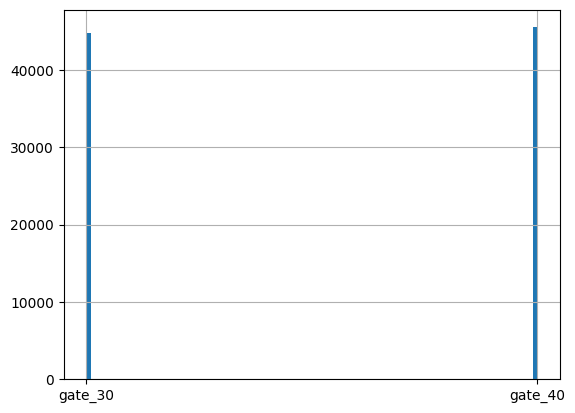

In [15]:
df["version"].hist(bins=100)

<Axes: >

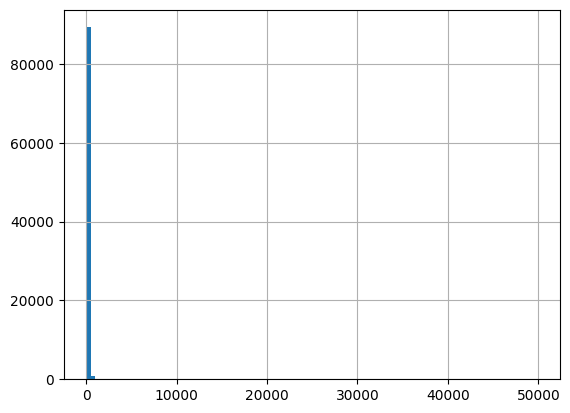

In [16]:
df["sum_gamerounds"].hist(bins=100)

#**A-B TESTING**

## **Method 1**

In [17]:
df_gate30 = df[df["version"] == "gate_30"]
n_gate30 = len(df_gate30)

df_gate40 = df[df["version"] == "gate_40"]
n_gate40 = len(df_gate40)

In [18]:
n_gate30

44700

In [19]:
n_gate40

45489

In [20]:
df_gate30["sum_gamerounds"].mean()

52.45626398210291

In [21]:
df_gate40["sum_gamerounds"].mean()

51.29877552814966

In [22]:
df_gate30["sum_gamerounds"].mean() - df_gate40["sum_gamerounds"].mean()

1.157488453953249

In [23]:
n_total = n_gate30 + n_gate40
n_total

90189

In [24]:
# تعداد دفعاتی که کاربران در هر گروه بازی کردن
gate30_sum_gamerounds = np.sum(df_gate30["sum_gamerounds"])
print(f"The number of times users have played in the Gate30 group: {gate30_sum_gamerounds}")

gate40_sum_gamerounds = np.sum(df_gate40["sum_gamerounds"])
print(f"The number of times users have played in the Gate40 group: {gate40_sum_gamerounds}")

The number of times users have played in the Gate30 group: 2344795
The number of times users have played in the Gate40 group: 2333530


In [25]:
# احتمال مشاهده تبلیغات در گروه gate40
p_gate40 = n_gate40 / n_total
print(f"The possibility of seeing ADS in the group: {p_gate40}")

# احتمال عدم مشاهده تبلیغات در گروه gate30
p_gate30 = 1 - (n_gate30 / n_total)
print(f"The possibility of not seeing PSA in the group: {p_gate30}")

The possibility of seeing ADS in the group: 0.5043741476233243
The possibility of not seeing PSA in the group: 0.5043741476233243


In [26]:
# شبیه سازی تعداد دفعاتی که هر گروه بازی کردن با روش باینومیال
gate30_simulation = np.random.binomial(n_gate30, p_gate40, 10000)
gate40_simulation = np.random.binomial(n_gate40, p_gate30, 10000)

In [27]:
gate30_simulation

array([22362, 22489, 22632, ..., 22499, 22549, 22452])

In [28]:
gate40_simulation

array([23054, 23006, 23020, ..., 22935, 22947, 23019])

In [29]:
# محاسبه نرخ هر بازی در هر یک از گروه ها
gate30_rate_simulation = gate30_simulation / n_gate30
print(f"gate30 rate simulation: {gate30_rate_simulation}")

gate40_rate_simulation = gate40_simulation / n_gate40
print(f"gate40 rate simulation: {gate40_rate_simulation}")

gate30 rate simulation: [0.50026846 0.50310962 0.50630872 ... 0.50333333 0.5044519  0.50228188]
gate40 rate simulation: [0.50680384 0.50574864 0.50605641 ... 0.50418783 0.50445163 0.50603443]


In [30]:
obs_diff = df_gate40["sum_gamerounds"].mean() - df_gate30["sum_gamerounds"].mean()
obs_diff

-1.157488453953249

In [31]:
diff = gate40_rate_simulation - gate30_rate_simulation
diff

array([ 6.53538631e-03,  2.63902284e-03, -2.52315590e-04, ...,
        8.54492295e-04, -2.75898252e-07,  3.75254671e-03])

In [32]:
# محاسبه p-value
p_val = np.mean(diff >= obs_diff)
print(f"p-vlaue: {p_val}")

p-vlaue: 1.0


In [82]:
np.mean(diff >= (n_gate40 / n_total) - (n_gate30 / n_total))

0.0042

In [33]:
p_val = np.mean(diff <= obs_diff)
print(f"p-vlaue: {p_val}")

p-vlaue: 0.0




> **در اینجا حد آستانه رو 0.05 گرفتیم با توجه به نتیجه که کمتر از حد آستانه هست میتونیم بگیم که افزایش تبلیغات در تعداد دور های بازی تاثیر نداشته است**


<Axes: ylabel='Count'>

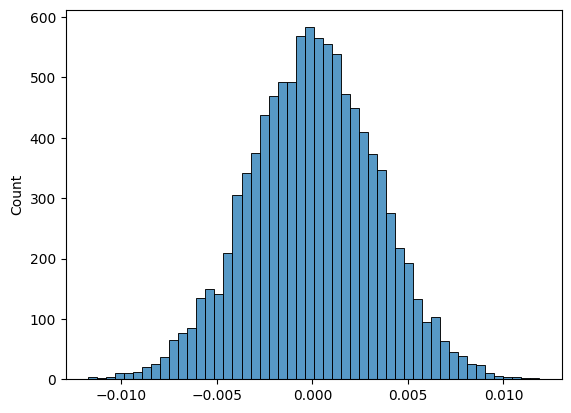

In [34]:
sns.histplot(diff, bins=50)

## **Method 2**

In [35]:
gate30_data = df.query("version  == 'gate_30'")
gate40_data = df.query("version  == 'gate_40'")

In [36]:
df["version"].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [37]:
df2 = gate30_data.merge(gate40_data, how="outer")
df2

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,1066,gate_30,0,False,False
3,2101,gate_30,0,False,False
4,2179,gate_30,39,True,False
...,...,...,...,...,...
90184,9998733,gate_40,10,True,False
90185,9999441,gate_40,97,True,False
90186,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


In [38]:
df2.version = df2.version.replace({"gate_30": 0, "gate_40": 1})
df2

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,0,3,False,False
1,337,0,38,True,False
2,1066,0,0,False,False
3,2101,0,0,False,False
4,2179,0,39,True,False
...,...,...,...,...,...
90184,9998733,1,10,True,False
90185,9999441,1,97,True,False
90186,9999479,1,30,False,False
90187,9999768,1,51,True,False


In [39]:
df2.version.value_counts()

1    45489
0    44700
Name: version, dtype: int64

In [40]:
df2_gate30 = df2.query("version  == 0 ")
df2_gate40 = df2.query("version  == 1 ")

In [41]:
df2_gate40

,userid,version,sum_gamerounds,retention_1,retention_7
44700,377,1,165,True,False
44701,483,1,1,False,False
44702,488,1,179,True,True
44703,540,1,187,True,True
44704,1444,1,2,False,False
...,...,...,...,...,...
90184,9998733,1,10,True,False
90185,9999441,1,97,True,False
90186,9999479,1,30,False,False
90187,9999768,1,51,True,False


In [42]:
df2_gate30["sum_gamerounds"].mean()

52.45626398210291

In [43]:
df2_gate40["sum_gamerounds"].mean()

51.29877552814966

In [44]:
d = df2_gate30["sum_gamerounds"].mean() - df2_gate40["sum_gamerounds"].mean()
d

1.157488453953249

In [45]:
np.zeros(len(df2_gate30))

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
sales = np.array([
    np.append(np.zeros(len(df2_gate30)), np.ones(len(df2_gate40))),
    np.append(df2_gate30["sum_gamerounds"], df2_gate40["sum_gamerounds"])
])
sales

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 3., 38.,  0., ..., 30., 51., 16.]])

In [47]:
sales_t = sales.T
sales_t

array([[ 0.,  3.],
       [ 0., 38.],
       [ 0.,  0.],
       ...,
       [ 1., 30.],
       [ 1., 51.],
       [ 1., 16.]])

In [48]:
experiment_label = np.random.randint(0, 2, size=len(sales_t))
experiment_label

array([0, 0, 1, ..., 0, 1, 0])

In [49]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
experiment_label

array([0, 0, 1, ..., 0, 1, 0])

In [50]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 0.,  3.],
       [ 0., 38.],
       [ 1.,  0.],
       ...,
       [ 0., 30.],
       [ 1., 51.],
       [ 0., 16.]])

In [51]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

52.2131478075909

In [52]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

51.53118341619318

In [53]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean() - experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

0.6819643913977202

In [54]:
def exp(N):
    sales = np.array([
    np.append(np.zeros(len(df2_gate30)), np.ones(len(df2_gate40))),
    np.append(df2_gate30["sum_gamerounds"], df2_gate40["sum_gamerounds"])
    ])

    sales_t = sales.T

    experiment_diff_mean = np.empty([N,1])
    for time in range(N):
        experiment_label = np.random.randint(0, 2, size=len(sales_t))

        experiment_data_t = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[time] = experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean() - experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

    return experiment_diff_mean

In [55]:
e1 = exp(10000)
e1

array([[-1.34671021],
       [ 0.93714581],
       [-0.7764739 ],
       ...,
       [ 2.00673364],
       [-1.15766085],
       [ 0.52497726]])

In [56]:
print(f"p-value: {len(e1[e1 >= d]) / len(df2)}")

p-value: 0.02574593353956691




> **ما اینجا حد آستانه رو 0.05 در نظر گرفتیم و با توجه به حد آستانه چون از پی ولیو کمتر شده به همین دلیل تبلیغات باعث افزایش تعداد دورهای بازی برای کاربران نمیشه**



## **U-TEST**

In [57]:
gate30 = df[df["version"] == "gate_30"]["sum_gamerounds"]

In [58]:
gate40 = df[df["version"] == "gate_40"]["sum_gamerounds"]

In [59]:
gate30

0         3
1        38
6         0
11        0
13       39
         ..
90179    14
90180     7
90182    21
90183    10
90186    28
Name: sum_gamerounds, Length: 44700, dtype: int64

In [60]:
gate30.mean()

52.45626398210291

In [61]:
gate40.mean()

51.29877552814966

In [62]:
p = stats.mannwhitneyu(gate30, gate40, alternative='two-sided')

In [63]:
p

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)



> **خب با توجه به نتایج تست هایی که انجام دادیم متوجه میشیم که تبلیغات باعث افزایش تعداد دورهای بازی برای کاربران نمیشه**



In [64]:
len_total=len(df)
len_ad=len(gate40_data)
len_noAd=len(gate30_data)
N = 1000

In [65]:
new_page_converted = np.random.choice([1, 0], size=len(gate40_data), p=[len_ad/len_total ,1-(len_ad/len_total) ])
new_page_converted

array([1, 1, 0, ..., 1, 1, 1])

In [66]:
old_page_converted = np.random.choice([1, 0], size=len(gate30_data), p=[len_noAd/len_total ,1-(len_noAd/len_total)])

In [67]:
df2 = np.concatenate((new_page_converted, old_page_converted))

In [68]:
df2

array([1, 1, 0, ..., 1, 1, 0])

In [69]:
chancy_labeled_mean_diff = np.empty([N, 1])

In [70]:
chancy_labeled_data = np.array([
    df2,
    np.array(df.sum_gamerounds)

]).T

In [71]:
chancy_labeled_data

array([[  1,   3],
       [  1,  38],
       [  0, 165],
       ...,
       [  1,  28],
       [  1,  51],
       [  0,  16]])

In [72]:
def ee(N):
    for times in np.arange(N):
        new_page_converted = np.random.choice([1, 0], size=len(gate40_data), p=[len_ad/len_total ,1-(len_ad/len_total) ])
        old_page_converted = np.random.choice([1, 0], size=len(gate30_data), p=[len_noAd/len_total ,1-(len_noAd/len_total)])
        df2 = np.concatenate((new_page_converted, old_page_converted))
        chancy_labeled_data = np.array([
            df2,
            np.array(df.sum_gamerounds)

        ]).T
        chancy_labeled_mean_ad   = chancy_labeled_data[chancy_labeled_data[:, 0] == 1][:, 1].mean()
        chancy_labeled_mean_noAd = chancy_labeled_data[chancy_labeled_data[:, 0] == 0][:, 1].mean()
        chancy_labeled_mean_diff[times] = chancy_labeled_mean_ad - chancy_labeled_mean_noAd
    return chancy_labeled_mean_diff

In [73]:
e=ee(N)
p_value = len(e [e <  d]) / len(e)
if p_value<d:
    print(f'p_value = {p_value} implies Bad advertisements was the reason for reduction of sum of game rounds')
else:
    print(f"p_value = {p_value}. There is not enough evidences that confirm the bad advertisements was the reason for reduction in sum of game rounds")

p_value = 0.76 implies Bad advertisements was the reason for reduction of sum of game rounds


In [74]:
N=10000

def sh_exp(N):
    len_total=len(df)
    len_ad=len(gate40_data)
    len_noAd=len(gate30_data)
    chancy_labeled_mean_diff = np.empty([N, 1])
    for times in np.arange(N):
        chancy_labels = np.random.choice([1,0], size=len_total,  p=[len_ad/len_total ,1-(len_ad/len_total) ])
        chancy_labeled_data = np.array([
            chancy_labels,
            np.array(df.sum_gamerounds)

        ]).T
        chancy_labeled_mean_ad   = chancy_labeled_data[chancy_labeled_data[:, 0] == 1][:, 1].mean()
        chancy_labeled_mean_noAd = chancy_labeled_data[chancy_labeled_data[:, 0] == 0][:, 1].mean()
        chancy_labeled_mean_diff[times] = chancy_labeled_mean_ad - chancy_labeled_mean_noAd
    return chancy_labeled_mean_diff


e=sh_exp(N  )
p_value = len(e [e <  d]) / len(e)
if p_value<d:
    print(f'p_value = {p_value} implies Bad advertisements was the reason for reduction of sum of game rounds')
else:
    print(f"p_value = {p_value}. There is not enough evidences that confirm the bad advertisements was the reason for reduction in sum of game rounds")

p_value = 0.7637 implies Bad advertisements was the reason for reduction of sum of game rounds


## **Normal Distribution**

In [75]:
stats.shapiro(gate30)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.08805108070373535, pvalue=0.0)

In [76]:
stats.shapiro(gate40)

ShapiroResult(statistic=0.48256635665893555, pvalue=0.0)

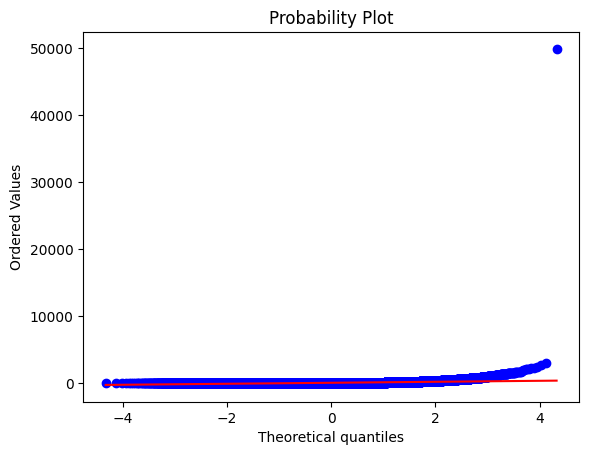

In [77]:
stats.probplot(df["sum_gamerounds"], plot=plt);

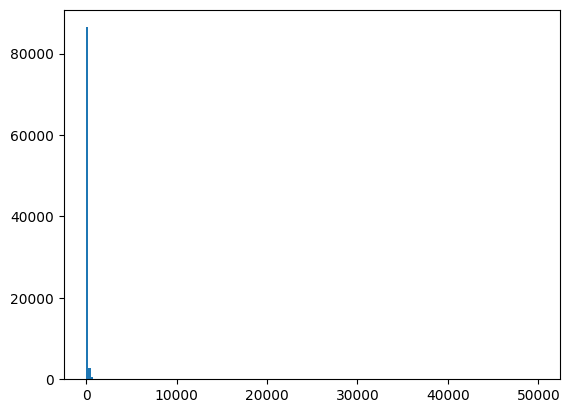

In [78]:
plt.hist(df["sum_gamerounds"], bins=200);

In [79]:
stats.kstest(df["sum_gamerounds"], 'norm')

KstestResult(statistic=0.8715607041848303, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [80]:
stats.levene(df2["version"], df["sum_gamerounds"])

IndexError: ignored

In [ ]:
stats.kruskal(df2["version"], df2["sum_gamerounds"])

# print("Statistics=%.3f, p-value=%.3f" % (stat, p_value))